# Working with hypotheses, A/B test and analysis of its results

<b> Project: </b>
* For one large online store, it is required to prioritize hypotheses and conduct an A/B test to increase revenue.
      
<b> Data provided: </b>
* The data for the first part is the hypothesis.csv file.
    * Hypothesis — a brief description of the hypothesis;
    * Reach — user coverage on a 10-point scale;
    * Impact — impact on users on a 10-point scale;
    * Confidence — confidence in the hypothesis on a 10-point scale;
    * Efforts — the cost of resources to test the hypothesis on a 10-point scale. The greater the value of Efforts, the more expensive hypothesis testing is.
* Data for the second part is the orders.csv file.
    * TransactionID — order ID;
    * visitorID — ID of the user who made the order;
    * date — the date when the order was made;
    * revenue — order revenue;
    * group — the A/B test group that the order fell into.
* A file with the number of users on the specified date in the specified A/B test group - visitors.csv.
    * date — date;
    * group — A/B test group;

<b> Research objectives: </b>
- Prioritization of hypotheses;
- Analysis of test results.

In [257]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

## Prioritization of hypotheses

In [258]:
hypothesis = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_07/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [259]:
pd.options.display.max_colwidth = 150

In [260]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [261]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Summary
Using the "ICE" and "RICE" frameworks to assess the priority of hypotheses, we got two tables with ratings sorted in descending order. The priority of hypotheses is different, since the second evaluation method includes the "Reach" indicator - the degree of coverage of users who will be affected by the innovation. A discount on a product on a birthday may increase sales, but the control group for the experiment will be negligible, which will make it difficult to conduct an A /B test. As for the leader of the "RICE" framework, we can say that the main component of the success of this hypothesis is the coverage of all users of the online store.

## A/B test analysis

### Data Preparation and Exploration

In [262]:
orders = pd.read_csv('/Users/vintera/Git/projects/my-projects/dataset/project_07/orders.csv')
visitors = pd.read_csv('/Users/vintera/Git/projects/my-projects/dataset/project_07/visitors.csv')

In [263]:
orders.sample(5)
orders.info()

,transactionId,visitorId,date,revenue,group
447,1679400779,600572117,2019-08-03,2890,B
509,3913205113,4006260374,2019-08-06,3140,B
639,3047865341,2461709734,2019-08-04,5119,B
119,3769777863,2038023866,2019-08-22,4480,B
60,1421016313,4256040402,2019-08-16,56650,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [264]:
visitors.sample(5)
visitors.info()

,date,group,visitors
14,2019-08-15,A,628
22,2019-08-23,A,468
19,2019-08-20,A,575
61,2019-08-31,B,718
18,2019-08-19,A,502


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Data preprocessing and research

In [265]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Summary

The test results data containing information about orders and visitors have been read, examined, and the date format in them has been corrected. In other words, the data is ready to work with them.

## Exploratory Data Analysis

#### Cumulative revenue by group

In [266]:
# Create a table containing unique test dates for each of the groups
datesGroups = orders[['date', 'group']].drop_duplicates()

# Using the resulting table, we will get aggregated cumulative data on orders by days
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# As well as aggregated cumulative data on the visitors of the online store by day
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Merge tables, rename columns and add new ones
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData['avgCheck'] = cumulativeData['revenue'] / cumulativeData['orders']

# Divide the data into groups
cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')

cumulativeData.head(5)
cumulativeDataA.head(5)
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294
6,2019-08-04,A,84,77,425699,2562,0.032787,5067.845238
8,2019-08-05,A,109,100,549917,3318,0.032851,5045.110092


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
5,2019-08-03,B,61,59,380996,1803,0.033833,6245.836066
7,2019-08-04,B,78,75,489567,2573,0.030315,6276.500000
9,2019-08-05,B,101,98,581995,3280,0.030793,5762.326733


Text(0.5, 0, 'Experiment date')

Text(0, 0.5, 'Cumulative revenue')

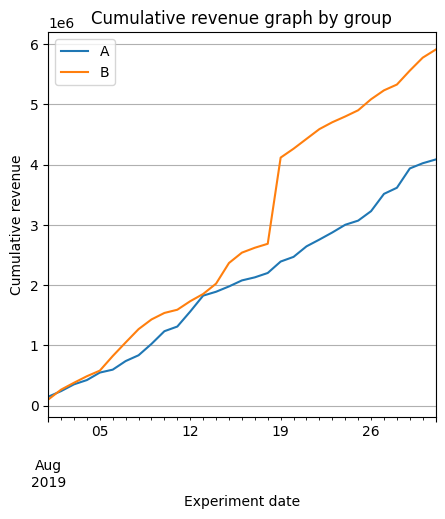

In [267]:
# Plot the cumulative revenue by groups
pltA = cumulativeDataA.plot(
    x='date', y='revenue', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='revenue', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='Cumulative revenue graph by group')
plt.xlabel('Experiment date')
plt.ylabel('Cumulative revenue')

##### Summary
Based on the graph, we can say that until August 18, the cumulative amount of revenue for the groups was relatively equal, after which the indicators of group B began to significantly exceed the indicators of group A. Analyzing what we saw on the graph, we can assume that on 08/19/19 the buyers of group B had a surge in purchasing activity or they made one or more abnormally expensive purchases on the total amount is about 1.5 million.

#### Cumulative average check by group

Text(0.5, 0, 'Experiment date')

Text(0, 0.5, 'Average check amount')

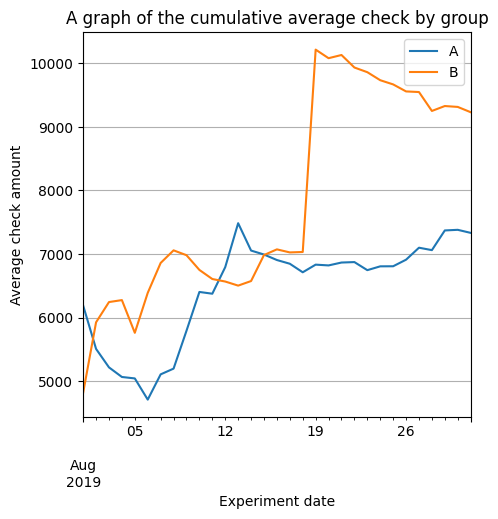

In [268]:
# Plot the cumulative average check by groups
pltA = cumulativeDataA.plot(
    x='date', y='avgCheck', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='avgCheck', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='A graph of the cumulative average check by group')
plt.xlabel('Experiment date')
plt.ylabel('Average check amount')

##### Summary
As expected, the average check of group B makes a jump in the same time period as in the revenue schedule and by the end of the test exceeds the average check of group A by an average of 2000.

#### Relative change of the cumulative average check of group B to group A

<AxesSubplot: title={'center': 'Relative change in the cumulative average check of group B to group A'}, xlabel='date'>

Text(0.5, 0, 'Experiment date')

Text(0, 0.5, 'Relative change')

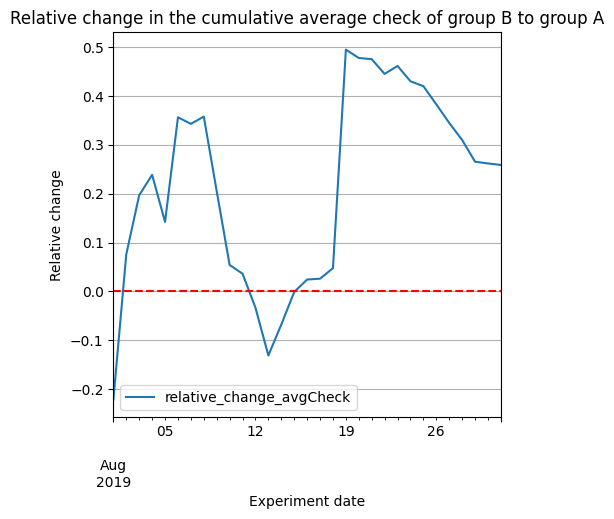

In [269]:
# Combine the cumulative data of the groups
mergedAB = cumulativeDataA.merge(cumulativeDataB, on='date', how='left', suffixes=['A', 'B'])

# Calculate the relative change in the amount of the average check of group B to group A
mergedAB['relative_change_avgCheck'] = (mergedAB['avgCheckB']/(mergedAB['avgCheckA'])-1)

# Build a graph
mergedAB.plot(
    x='date', y='relative_change_avgCheck', style='-', figsize=(5, 5), grid=True, 
    title='Relative change in the cumulative average check of group B to group A')
plt.xlabel('Experiment date')
plt.ylabel('Relative change')
plt.axhline(y=0, color='red', linestyle='--')

##### Summary
The graph shows spikes in the indicators of the average check of group B in relation to the indicators of group A, which may indicate the presence of abnormal values in the available data.

#### Cumulative conversion by groups

(0.0, 0.07)

Text(0.5, 0, 'Experiment date')

Text(0, 0.5, 'Conversion rate')

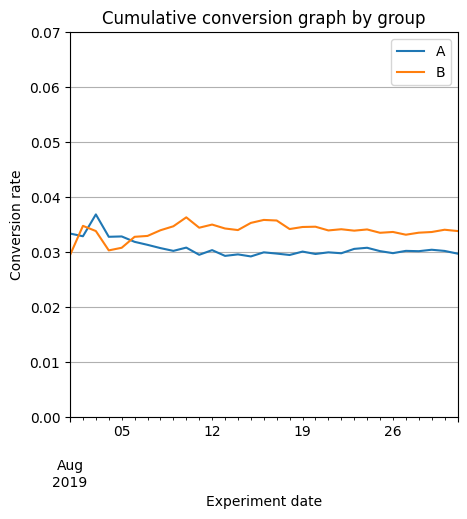

In [270]:
# Plot the cumulative conversion by groups
pltA = cumulativeDataA.plot(
    x='date', y='conversion', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='conversion', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='Cumulative conversion graph by group')
plt.ylim(0, 0.07)
plt.xlabel('Experiment date')
plt.ylabel('Conversion rate')

##### Summary
Until about 06.08, the conversion rates of groups are distributed proportionally to each other, after which, up to 10.08, the conversion of group B increases, and group A goes down. After 10.08, the indicators of the groups are fixed and distributed on the graph in parallel to each other.

#### Relative change in cumulative conversion of group B to Group A

<AxesSubplot: title={'center': 'Relative change in the cumulative conversion of group B to group A'}, xlabel='date'>

Text(0.5, 0, 'Experiment date')

Text(0, 0.5, 'Relative change')

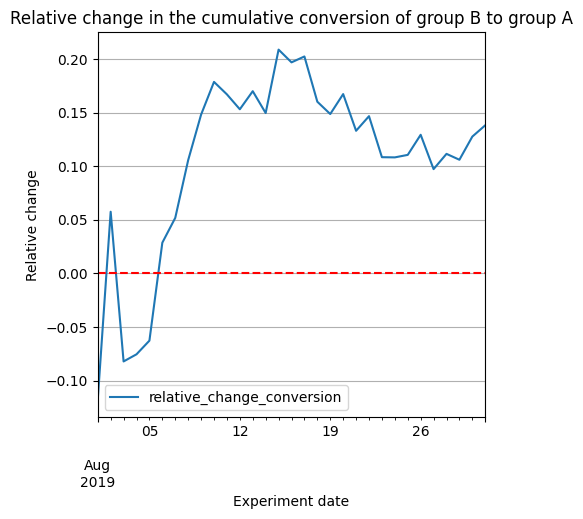

In [271]:
# Calculate the relative change in the conversion of group B to group A
mergedAB['relative_change_conversion'] = (mergedAB['conversionB']/(mergedAB['conversionA'])-1)

# Build a graph
mergedAB.plot(
    x='date', y='relative_change_conversion', style='-', figsize=(5, 5), grid=True, 
    title='Relative change in the cumulative conversion of group B to group A')
plt.xlabel('Experiment date')
plt.ylabel('Relative change')
plt.axhline(y=0, color='red', linestyle='--')

##### Summary
Before 06.08 the indicators of group B fluctuated in relation to group A (at first they were higher, then lower), then after that date they jumped and fixed at a high level.

#### Number of orders by user

<AxesSubplot: title={'center': 'Number of orders by user'}, xlabel='id', ylabel='orders'>

Text(0.5, 0, 'Users')

Text(0, 0.5, 'Number of orders')

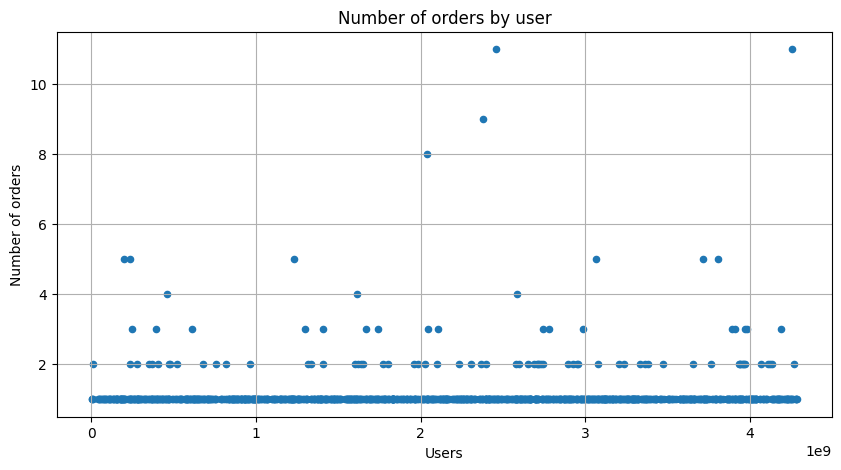

In [272]:
# Group the order data to get data on the number of orders per user
number_of_orders = orders.groupby('visitorId').agg({'transactionId' : 'count'}).reset_index()
number_of_orders.columns = ['id', 'orders']

# Build a dot graph
number_of_orders.plot(x='id', y='orders', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(10,5), 
                    title='Number of orders by user')
plt.xlabel('Users')
plt.ylabel('Number of orders')

##### Summary
Customers who have placed more than two orders can be counted on the fingers. Basically, customers placed one order during the study period.

#### Percentile of the number of orders per user

In [273]:
orders_percentile = np.percentile(number_of_orders['orders'], [95, 99]) 
print('Total customers who have made orders: {}'.format(len(number_of_orders)))
print()
print('95th percentile: {:.0f} orders'.format(orders_percentile[0]))
print('Customers who have made more than 2 orders: {}, which is: {:.1%} of the total number of orders'.format(
    number_of_orders.query('orders > 2')['orders'].count(), (
        number_of_orders.query('orders > 2')['orders'].count() / len(number_of_orders))))
print()
print('99th percentile: {:.0f} orders'.format(orders_percentile[1]))
print('Customers who have made more than 4 orders: {}, which is: {:.1%} of the total number of orders'.format(
    number_of_orders.query('orders > 4')['orders'].count(), (
        number_of_orders.query('orders > 4')['orders'].count() / len(number_of_orders))))

Total customers who have made orders: 1031

95th percentile: 2 orders
Customers who have made more than 2 orders: 30, which is: 2.9% of the total number of orders

99th percentile: 4 orders
Customers who have made more than 4 orders: 10, which is: 1.0% of the total number of orders


##### Summary
Based on the data obtained, it is advisable to choose the 95th percentile as the limit for abnormal users, which means to get rid of the data of 30 customers who have made more than 2 orders (2.9%).

#### Cost of orders

<AxesSubplot: title={'center': 'Order cost chart'}, xlabel='visitorId', ylabel='revenue'>

Text(0.5, 0, 'Users')

Text(0, 0.5, 'The cost of the order')

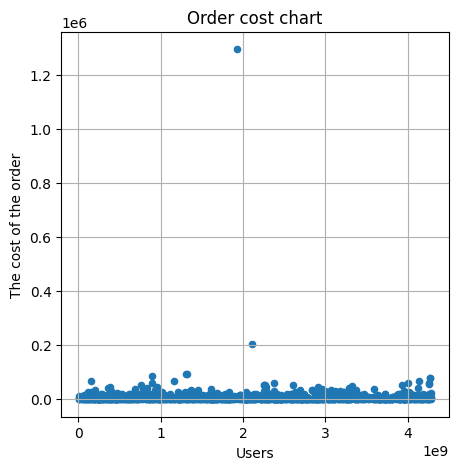

In [274]:
# Build a dot graph
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(5,5), 
                    title='Order cost chart')
plt.xlabel('Users')
plt.ylabel('The cost of the order')

##### Comment
Because of one purchase, worth more than 1 million, the schedule turned out to be not very informative. Let's try again, setting the limit to 100 thousand.

<AxesSubplot: title={'center': 'Order cost chart'}, xlabel='visitorId', ylabel='revenue'>

Text(0.5, 0, 'Users')

Text(0, 0.5, 'The cost of the order')

(0.0, 100000.0)

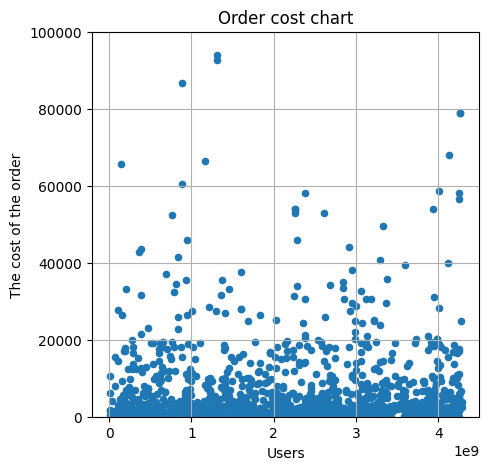

In [275]:
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(5,5), 
                    title='Order cost chart')
plt.xlabel('Users')
plt.ylabel('The cost of the order')
plt.ylim(0, 100000)

##### Summary
Now the distribution of costs is more clearly visible. It is safe to say that the vast majority of the order values did not exceed 20,000.

#### Percentiles of the cost of orders

In [276]:
price_percentile = np.percentile(orders['revenue'], [95, 99]) 
print('Total orders: {}'.format(len(orders)))
print()
print('95th percentile: {:.0f}'.format(price_percentile[0]))
print('Number of orders over 28000: {}'.format(
    orders.query('revenue > 28000')['revenue'].count()))
print()
print('99th percentile: {:.0f}'.format(price_percentile[1]))
print('Number of orders over 58233: {}'.format(
    orders.query('revenue > 58233')['revenue'].count()))

Total orders: 1197

95th percentile: 28000
Number of orders over 28000: 60

99th percentile: 58233
Number of orders over 58233: 12


##### Summary
A total of 60 out of 1,197 orders exceed the cost of 28,000. The boundary for determining abnormal orders is the 95th percentile.

#### Statistical significance of differences in conversion between groups based on "raw" data

In [277]:
# Сount the number of orders for each user by groups
ordersByUsersA = orders.query(
    'group == "A"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersA.columns = ['id', 'orders']

ordersByUsersB = orders.query(
    'group == "B"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersB.columns = ['id', 'orders']

In [278]:
ordersByUsersA['id'].count() + ordersByUsersB['id'].count()

1089

##### Comment
When grouped by users, broken down into groups A and B, 1089 users turned out, and as we could see earlier, when grouped to form a dot graph without splitting into groups, there were 1031 users.

In [279]:
visitorsB = pd.Series(ordersByUsersB['id'])
ordersByUsersA.query('id in @visitorsB')['id'].count()

58

##### Comment
Checking for matching IDs in groups showed that 58 users with the same id made purchases in both groups. This fact may negatively affect the results of the study, so we will inform the data engineers, management or the customer about it. While the answer has not been received and it is unknown what actions to take, we will continue to conduct research with the available data.

In [280]:
# Сreate tables with the number of rows equal to the number of all visitors and orders made during this time
sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [281]:
# Сalculate the statistical significance of the difference in group conversions by applying the Mann-Whitney test
print('P-value: {:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Difference in group conversions: {:.3f}'.format(sampleB.mean() / sampleA.mean()-1))

P-value: 0.017
Difference in group conversions: 0.138


##### Summary
The P-value is less than 0.05, and therefore we reject the null hypothesis. Based on the analysis of "raw data", there are statistically significant differences in the conversion between the groups. The relative increase in the conversion rate of group B to the conversion rate of group A is 13.8%.

#### Statistical significance of differences in the average check between groups based on "raw" data

In [282]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

In [283]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])[1]))
print('The difference in the average check of groups: {:.3f}'.format(ordersB['revenue'].mean() / ordersA['revenue'].mean()-1))

P-value: 0.729
The difference in the average check of groups: 0.259


##### Summary
The P-value is greater than 0.05 — there are no statistically significant differences in the average check between the groups. However, the relative difference of the average check between the groups is 25.9%. Extremely suspicious result.

#### Statistical significance of differences in conversion between groups based on "purified" data

In [284]:
# Users who have made more than 2 orders
usersWithManyOrders = pd.concat(
    [ordersByUsersA.query('orders > 2')['id'], ordersByUsersB.query('orders > 2')['id']], axis=0)

# Users who have made purchases over 28000
usersWithExpensiveOrders = orders.query('revenue > 28000')['visitorId']

# Combine the received data
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [285]:
# Get similar tables filtered from abnormal users
cleared_sampleA = pd.concat(
    [ordersByUsersA.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

cleared_sampleB = pd.concat(
    [ordersByUsersB.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [286]:
# Calculate the statistical significance of the difference in group conversions by applying the Mann-Whitney test
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_sampleA, cleared_sampleB)[1]))
print('Difference in group conversions: {:.3f}'.format(cleared_sampleB.mean() / cleared_sampleA.mean()-1))

P-value: 0.013
Difference in group conversions: 0.173


##### Summary
P-value less than 0.05 - we reject the null hypothesis. Based on the analysis of the "cleared data", there are statistically significant differences in the conversion between the groups. The relative increase in the conversion of group B to the conversion of group A increased compared to the previous result of "raw data" and amounted to 17.3%.

#### Statistical significance of differences in the average order receipt between groups based on "cleared" data

In [287]:
cleared_ordersA = orders.query('group == "A" and visitorId not in @abnormalUsers')
cleared_ordersB = orders.query('group == "B" and visitorId not in @abnormalUsers')

In [288]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_ordersA['revenue'], cleared_ordersB['revenue'])[1]))
print('The difference in the average check of groups: {:.3f}'.format(
    cleared_ordersB['revenue'].mean() / cleared_ordersA['revenue'].mean()-1))

P-value: 0.738
The difference in the average check of groups: -0.020


##### Summary
The P-value has hardly changed and has remained the same over 0.05 — there are no statistically significant differences in the average check between the groups according to the "cleared data". The relative difference in average receipts has changed significantly - from an increase of 25.9% on "raw" data to a loss of 2% on "cleared" data. Apparently, the same purchase worth over 1200,000 was made by a customer from group B.

## General Conclusion and Recommendations

The analysis of the A/B test allows us to draw the following conclusions:
- Taking into account the anomalies:
- there are statistically significant differences in the conversions of the groups. The relative increase in the conversion rate of group B to the conversion rate of group A is 13.8%.
   - there are no statistically significant differences in the average check between the groups. The average customer receipt of Group B is 25.9% higher than that of Group A.
 
 
  - Excluding anomalies:
- there are statistically significant differences in the conversions of the groups. The relative increase in the conversion rate of group B to the conversion rate of group A is 17.3%.
   - there are no statistically significant differences in the average check between the groups. The average customer receipt of Group B is 2% lower than that of Group A.
   
Based on the results obtained, given that with almost the same number of users, more orders are made in group B than in group A, we can say about the positive result of the test and an increase in conversion in group B. According to data not filtered from abnormal purchases, we can also boldly declare the victory of group B, whose indicators are a quarter higher than group A, however, by removing abnormally expensive purchases, the group's revenues lose significant differences, and group B already loses by 2% in this indicator.

To answer the question about the future of the A/ B test, we need to know what hypothesis he tested and what results the customer expected. If the purpose of the test was to establish an increase in conversion, then it can be considered successful, recognize the victory of group B and complete. If the main expectation from the test was an increase in revenue, then it is necessary to continue the test, since the indicators of "raw" and "cleaned" data vary greatly, perhaps after some time abnormally expensive purchases made in group B will cease to be an exception and become an ordinary event.